PHYS 381: Computational Physics

Assignment 1: Finding the Minima of Functions

Jared Crebo 30085839

Kernel: Python 3.10.11 | IDE: Visual Studio Code

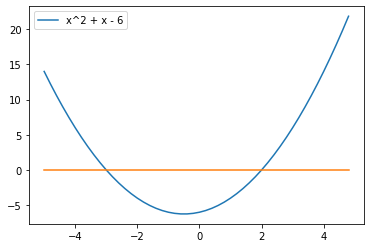

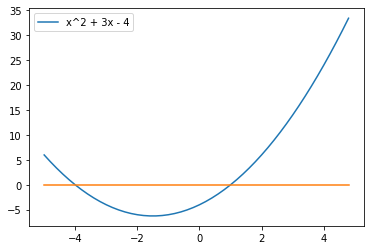

In [24]:
# 2b
import matplotlib.pylab as plt
import numpy as np
a = 1
b = 1
c = -6
x = np.arange(-5.0, 5.0, 0.2)
plt.plot(x, a * x * x + b * x + c, label="x^2 + x - 6")
plt.plot(x, 0.0 * x)
plt.legend()
plt.show()

# 2c
a = 1
b = 3
c = -4
x = np.arange(-5.0, 5.0, 0.2)
plt.plot(x, a * x * x + b * x + c, label="x^2 + 3x - 4")
plt.plot(x, 0.0 * x)
plt.legend()
plt.show()

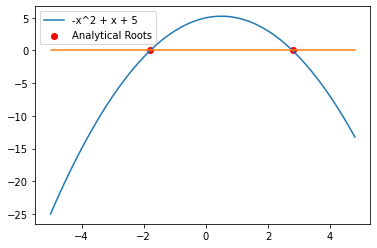

In [25]:
# 3a
a = -1
b = 1
c = 5
x = np.arange(-5.0, 5.0, 0.2)
plt.plot(x, a * x * x + b * x + c, label="-x^2 + x + 5")
plt.plot(x, 0.0 * x)

x1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
plt.scatter([x1,x2],[0,0],marker='o',color='red',label="Analytical Roots")
plt.legend()
plt.show()

Bisection Method

This code can be tested by calling the 'bisection()' method with parameters a, b, c, x1, x3. 

a, b, c correspond to a second-order parabolic function of the form $ax^2+bx+c$

x1 and x3 correspond to the domain [x1, x3] of your initial guess that must cross the x-axis

See the bottom of this code block for examples. 

Root found is (-2.791290283203125, 1.116190105676651e-05) which converged in 15 iterations. 


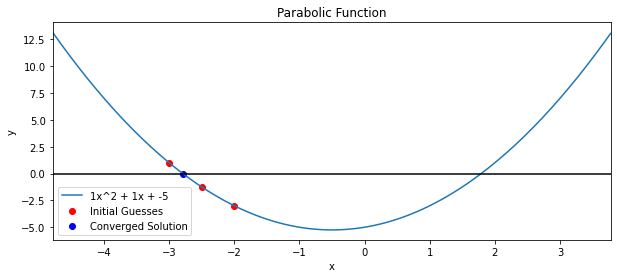

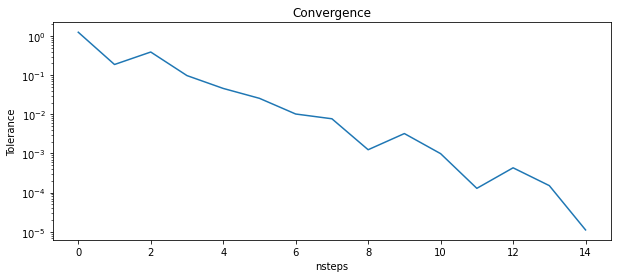

Root found is (1.791290283203125, 1.116190105676651e-05) which converged in 15 iterations. 


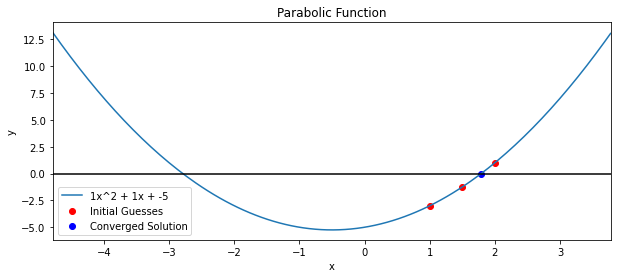

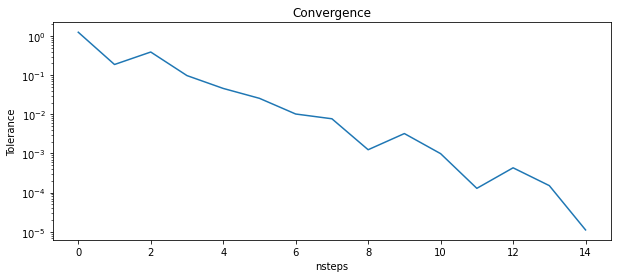

Root found is (2.9999961853027344, 3.433224628679454e-05) which converged in 18 iterations. 


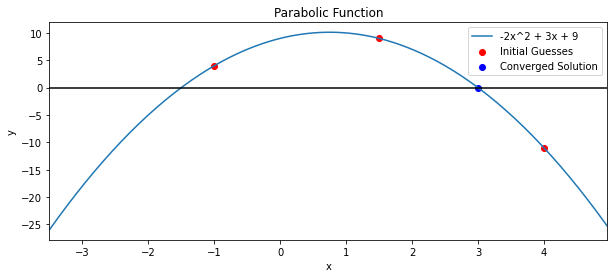

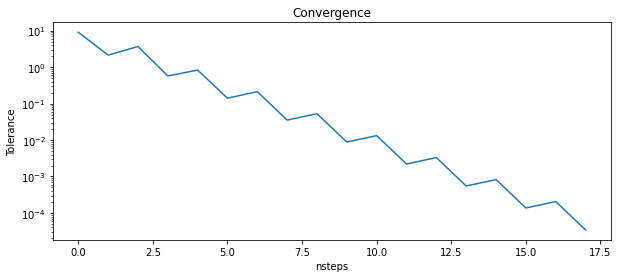

In [26]:
# 3b - 3f
import math
def bisection(a, b, c, x1, x3):
    # Check if roots are real
    if b**2 - 4*a*c < 0:
        print("This parabola contains no real roots. ")
        return
    else:
        # Determine analytical roots for plotting size
        roots = np.zeros(2)
        roots[0] = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
        roots[1] = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)

        # Initialize plot
        fig, ax = plt.subplots(figsize=[10,4])
        plt.title("Parabolic Function")
        plt.ylabel("y")
        plt.xlabel("x")
        x = np.arange(min(roots) - 2, max(roots) + 2, abs(roots[1]-roots[0])/100)
        y = a * x ** 2 + b * x + c
        plt.xlim(min(x), max(x))
        plt.plot(x,y,label=(str(a)+"x^2 + " + str(b)+ "x + " + str(c)))
        plt.hlines(0,min(x),max(x),color="black")
        

        # Initial guesses for root
        y1 = a * x1 ** 2 + b * x1 + c
        y3 = a * x3 ** 2 + b * x3 + c
        if y1 > 0 or y3 < 0:
            print("Initial guesses are not in the correct range. f(x1) must be < 0, f(x3) must be > 0")
            return
        else:
            x2 = (x1 + x3) / 2
            y2 = a * x2 ** 2 + b * x2 + c
            plt.scatter([x1,x2,x3],[y1,y2,y3],marker="o",color="red",label="Initial Guesses")

            # Converging tolerance surrounding 0
            tol = 1e-4
            converged = False
            tolerance = []
            
            nsteps = 0
            while not converged:
                #tolerance.append(math.log10(abs(y2)))
                tolerance.append(abs(y2))
                nsteps += 1
                # if y2 is greater than the root
                if y2 > tol:
                    # switch (x3,y3) to (x2,y2)
                    x3 = x2
                    y3 = y2

                    # update new (x2,y2)
                    x2 = (x1 + x3) / 2
                    y2 = a * x2 ** 2 + b * x2 + c
                elif y2 < -tol:
                    # switch (x1,y1) to (x2,y2)
                    x1 = x2
                    y1 = y2

                    # update new (x2,y2)
                    x2 = (x1 + x3) / 2
                    y2 = a * x2 ** 2 + b * x2 + c
                else:
                    # Root is found
                    print("Root found is (" + str(x2) + ", " + str(y2) + ") which converged in " + str(nsteps) + " iterations. ")
                    converged = True
            
            plt.scatter([x2],[y2],marker="o",color="blue",label="Converged Solution")
    plt.legend()
    plt.show()
    fig, ax = plt.subplots(figsize=[10,4])
    plt.title("Convergence")
    plt.ylabel("Tolerance")
    plt.xlabel("nsteps")
    plt.plot(np.arange(0,nsteps,1),tolerance,label="Convergence")
    plt.yscale('log')
    plt.show()



bisection(1,1,-5, -2, -3)
bisection(1,1,-5, 1, 2)

bisection(-2,3,9,4,-1)

Newton Raphson Method

This code can be tested by calling the 'newton_raphson()' method with parameters a, b, c, x. 

a, b, c correspond to a second-order parabolic function of the form $ax^2+bx+c$

x corresponds to the initial guess

See the bottom of this code block for examples.

Root found is (1.791287848332627, 3.916760249467188e-09) which converged in 7 iterations. 


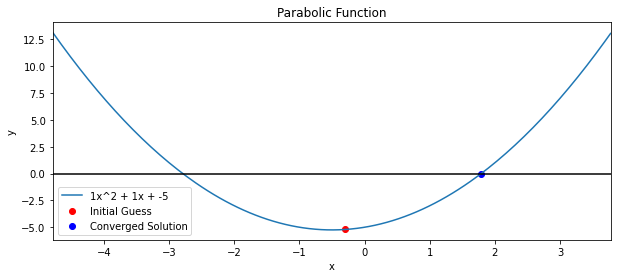

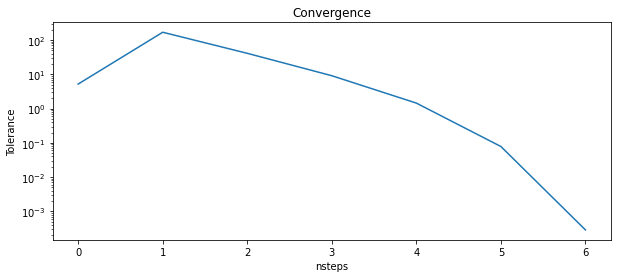

Root found is (-2.7912878495432403, 9.464486083743395e-09) which converged in 3 iterations. 


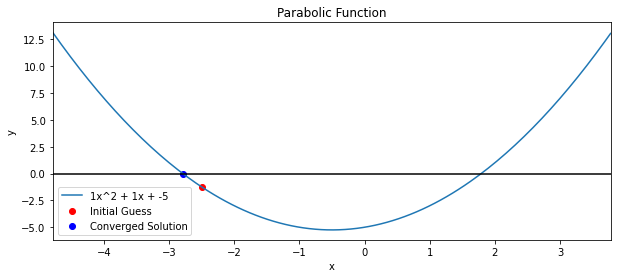

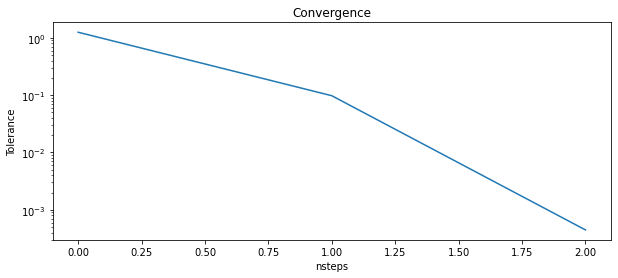

Root found is (3.000005374171438, -4.8367600705034874e-05) which converged in 3 iterations. 


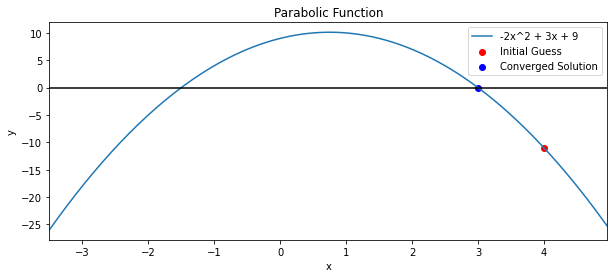

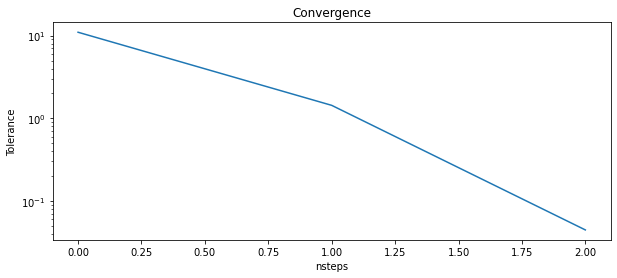

In [27]:
# f'(x)
def f_prime(a, b, x):
    return 2 * a * x + b

# f(x)
def f(a, b, c, x):
    return a * x ** 2 + b * x + c

def newton_raphson(a, b, c, x):
    # y and y' of initial guess x
    y = f(a, b, c, x)
    y_p = f_prime(a, b, x)

    # Determine analytical roots for plotting size
    roots = np.zeros(2)
    roots[0] = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    roots[1] = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)

    # Initialize plot
    fig, ax = plt.subplots(figsize=[10,4])
    plt.title("Parabolic Function")
    plt.ylabel("y")
    plt.xlabel("x")
    X = np.arange(min(roots) - 2, max(roots) + 2, abs(roots[1]-roots[0])/100)
    Y = a * X ** 2 + b * X + c
    plt.xlim(min(X), max(X))
    plt.plot(X,Y,label=(str(a)+"x^2 + " + str(b)+ "x + " + str(c)))
    plt.hlines(0,min(X),max(X),color="black")
    plt.scatter(x,y,label="Initial Guess",color="red")

    tol = 1e-4
    converged = False
    nsteps = 0
    tolerance = []

    while not converged:
        nsteps += 1
        #print(x,y)
        tolerance.append(abs(y))
        x += -y / y_p
        y = f(a, b, c, x)
        y_p = f_prime(a, b, x)
        if abs(y) < tol:
            converged = True
            print("Root found is (" + str(x) + ", " + str(y) + ") which converged in " + str(nsteps) + " iterations. ")
            plt.scatter(x,y,label="Converged Solution",color="blue")
    plt.legend()
    plt.show()
    fig, ax = plt.subplots(figsize=[10,4])
    plt.title("Convergence")
    plt.ylabel("Tolerance")
    plt.xlabel("nsteps")
    plt.plot(np.arange(0,nsteps,1),tolerance,label="Convergence")
    plt.yscale('log')
    plt.show()


newton_raphson(1,1,-5,-0.3)
newton_raphson(1,1,-5,-2.5)
newton_raphson(-2,3,9,4)

Find the Minima of a Potential Energy Function

This code can be tested by calling the 'newton_raphson_energy()' method with parameters x, relaxation_factor. 

x corresponds to the initial guess, relaxation_factor should be 1 if x is close to the real solution, otherwise relaxation_factor < 1 for convergence

See the bottom of this code block for examples.

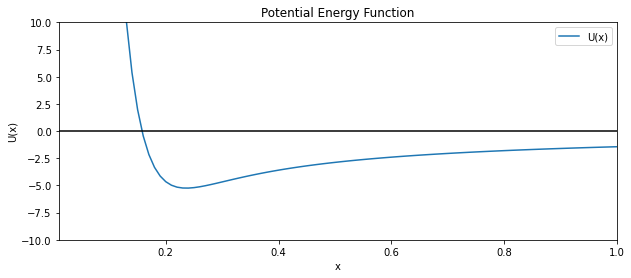

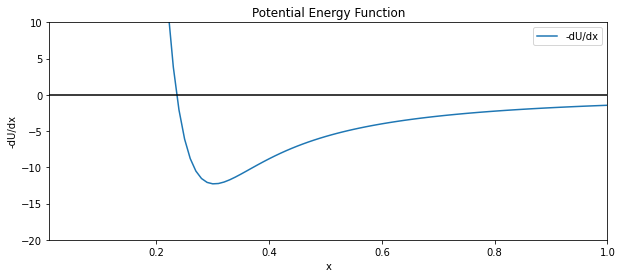



 Initializing Newton-Raphson method to find minimum of U(x) with an initial guess of 0.2


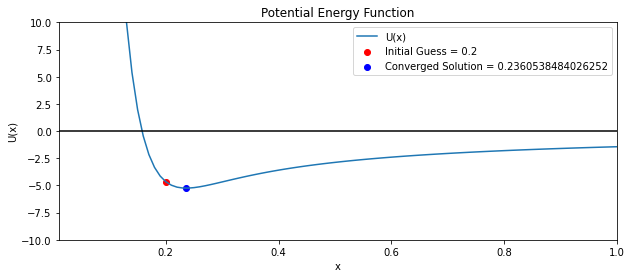

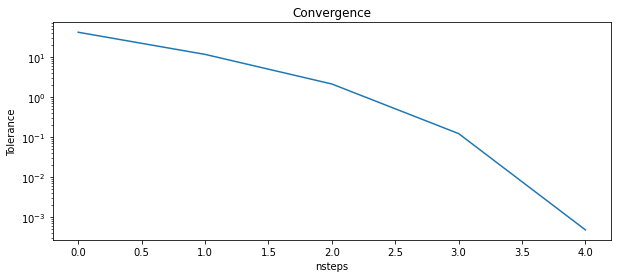

Minimum found is (0.2360538484026252, -5.247489118540432) which converged in 5 iterations. 


 Initializing Newton-Raphson method to find minimum of U(x) with an initial guess of 0.2


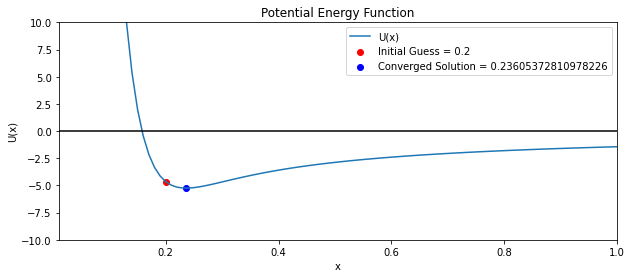

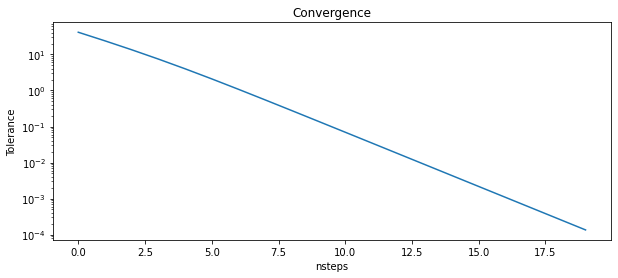

Minimum found is (0.23605372810978226, -5.24748911853635) which converged in 20 iterations. 


 Initializing Newton-Raphson method to find minimum of U(x) with an initial guess of 0.6


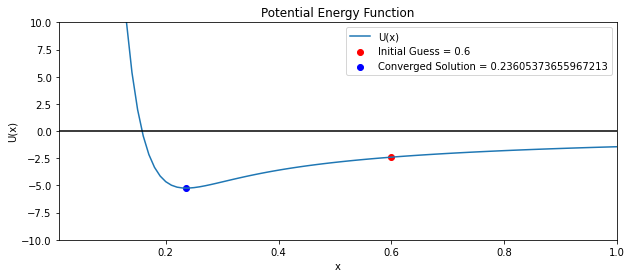

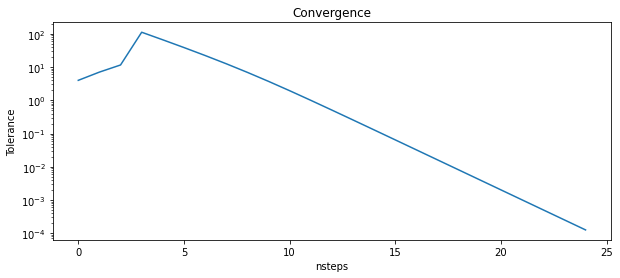

Minimum found is (0.23605373655967213, -5.247489118536904) which converged in 25 iterations. 


In [28]:
# Potential Energy Function
A = 1090 # eV
e = 1.44 # eV
p = 0.033 # nm
X = np.linspace(0.01, 1, 100)
U = A * np.exp(-X / p) - (e / X)
dU = - A * np.exp(-X / p) / p + (e / X**2)
ddU = A * np.exp(-X / p) / p**2 - (2 * e / X**3)

# Plot of U(x)
fig, ax = plt.subplots(figsize=[10,4])
plt.title("Potential Energy Function")
plt.ylabel("U(x)")
plt.xlabel("x")
plt.xlim(min(X), max(X))
plt.ylim(-10,10)
plt.plot(X,U,label="U(x)")
plt.hlines(0,min(X),max(X),color="black")
plt.legend()
plt.show()

# Plot of -dU/dx
fig, ax = plt.subplots(figsize=[10,4])
plt.title("Potential Energy Function")
plt.ylabel("-dU/dx")
plt.xlabel("x")
plt.xlim(min(X), max(X))
plt.ylim(-20,10)
plt.plot(X,-dU,label="-dU/dx")
plt.hlines(0,min(X),max(X),color="black")
plt.legend()
plt.show()

# Function U(x)
def Ux(x):
    return A * np.exp(-x / p) - (e / x)

# Function dU/dx
def dUdx(x):
    return - A * np.exp(-x / p) / p + (e / x**2)

# Function dU^2/d^2x
def ddUddx(x):
    return A * np.exp(-x / p) / p**2 - (2 * e / x**3)

def newton_raphson_energy(x, relaxation_factor):
    print("\n\n Initializing Newton-Raphson method to find minimum of U(x) with an initial guess of " + str(x))

    # y and y' of initial guess x
    y = dUdx(x)
    y_p = ddUddx(x)

    # Initialize plot of guesses
    fig, ax = plt.subplots(figsize=[10,4])
    plt.title("Potential Energy Function")
    plt.ylabel("U(x)")
    plt.xlabel("x")
    plt.xlim(min(X), max(X))
    plt.ylim(-10,10)
    plt.plot(X,U,label="U(x)")
    plt.hlines(0,min(X),max(X),color="black")
    plt.scatter(x,Ux(x),label=("Initial Guess = " + str(x)),color="red")

    # Converging tolerance
    tol = 1e-4
    converged = False
    nsteps = 0
    tolerance = []

    while not converged:
        #print(x,y)
        nsteps += 1
        tolerance.append(abs(y))
        
        # Relaxation factor prevents overshooting, increases computational time
        # Update new xn with Newton-Raphson formula
        if y > 0:
            x += relaxation_factor * y / y_p
        elif y < 0:
            x += - relaxation_factor * y / y_p
        
        # Update U'(x) and U''(x) with new xn
        y = dUdx(x)
        y_p = ddUddx(x)

        # Check convergence
        if abs(y) < tol:
            converged = True
    
    plt.scatter(x,Ux(x),label=("Converged Solution = " + str(x)),color="blue")
    plt.legend()
    plt.show()

    fig, ax = plt.subplots(figsize=[10,4])
    plt.title("Convergence")
    plt.ylabel("Tolerance")
    plt.xlabel("nsteps")
    plt.plot(np.arange(0,nsteps,1),tolerance,label="Convergence")
    plt.yscale('log')
    plt.show()

    print("Minimum found is (" + str(x) + ", " + str(Ux(x)) + ") which converged in " + str(nsteps) + " iterations. ")

# Standard Newton-Raphson without relaxation factor (relaxation_factor = 1)
newton_raphson_energy(0.2, 1)

# Newton-Raphson with relaxation factor 0.5 to check efficiency change
newton_raphson_energy(0.2, 0.5)

# Newton-Raphson with relaxation factor 0.5 testing for robustness
newton_raphson_energy(0.6, 0.5)

# Initial guess of 0.6 will not converge without relaxation factor
# newton_raphson_energy(0.6, 1)

Extra Plots for Explanations in the Report

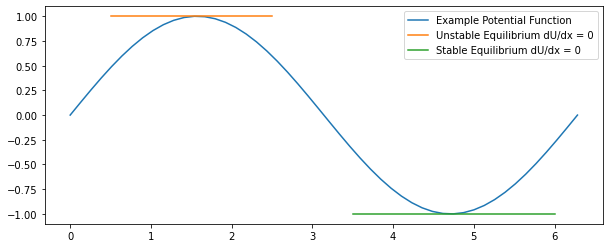

In [29]:
fig, ax = plt.subplots(figsize=[10,4])
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)
plt.plot(x,y,label="Example Potential Function")
x1 = np.linspace(0.5,2.5,50)
y1 = np.ones(len(x1))
x2 = np.linspace(3.5,6,50)
y2 = - np.ones(len(x2))
plt.plot(x1,y1,label="Unstable Equilibrium dU/dx = 0")
plt.plot(x2,y2,label="Stable Equilibrium dU/dx = 0")
'''
size = 10
x = np.zeros(size)
y = np.zeros(size)
x[0] = 2.5
y[0] = np.sin(x[0])
for i in range(1,size):
    x[i] = x[i-1] + 0.5
    y[i] = y[i-1] + np.cos(x[i-1]) * x[i]
    plt.quiver(x[i-1],y[i-1],x[i],y[i])
'''
plt.legend()
plt.show()